Fit to recent data: a = 0.24433291859411665 , b = 0.14362272745619276, c = 0.00011613737181815038
R2: 0.9984440541382983


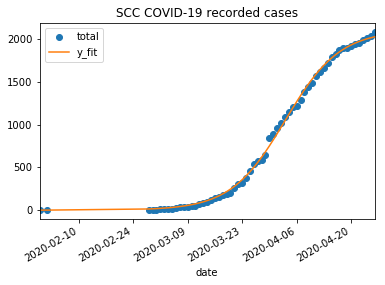

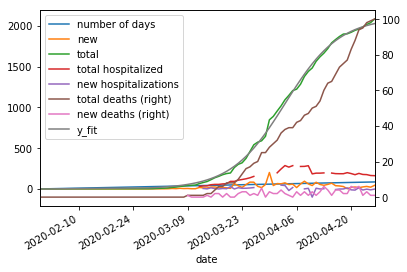

In [107]:
%matplotlib inline

# Analysis of COVID-19 case data using Santa Clara County reported dataset
# Chad R. Frost
# chad@chadfrost.com
# (c) 2020

from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import matplotlib.dates as mdates
import pandas as pd

# Exponential growth model
#def func(x, a, b, c):
#    return a * np.exp(b * x) + c

# Sigmoid (logistic) model
def func(x, a,b,c):
    return a / (c + np.exp(x*b*(-1)))

# R2 assessment of fit to data
def r2(x, y, y_fit):
    # residual sum of squares
    ss_res = np.sum((y - y_fit) ** 2)

    # total sum of squares
    ss_tot = np.sum((y - np.mean(y)) ** 2)

    # r-squared
    r2 = 1 - (ss_res / ss_tot)

    return r2

db = pd.read_excel("file:///Users/cfrost/Downloads/scccoronavirus.xlsx", usecols=[0,1,2,3,4,5,6,7], parse_dates=[0])

#print(db.head()) # Just to confirm that we've loaded a real data set
#print(db.tail())

# Fit the data
## make a monotonically increasing list representing time (days), for use in curve-fitting
#x = range(len(db.total))
x = db['number of days']

## put the running total into array of floats for curve fitting
y = np.array(db.total, dtype=float)

## Perform a least-squares fit to the model
popt, pcov = curve_fit(func, x, y, p0=(.01,.2,1))  # , p0=(0.1,0.2,.2)
print(f'Fit to recent data: a = {popt[0]} , b = {popt[1]}, c = {popt[2]}')

# Output: Plot the data & fits
## Create data to plot the fitted function 
y_fit = func(x, *popt)
db['y_fit']=y_fit # Add column to dataframe

## Show the quality of the fit
print(f'R2: {r2(x,y,y_fit)}')

# Do some plots!
## See https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.htm

## convert date col to datetime format
db['date'] = pd.to_datetime(db['date'])

## total cases and curve fit to data
ax1 = db.plot(x='date', y=['total', 'y_fit'], style=['o','-'], title="SCC COVID-19 recorded cases")
plt.legend()

## all data  in the dataframe (e.g. including fit)
#db_us.plot(secondary_y=('total_deaths','new_deaths'),logy=True)
ax2 = db.plot(x='date', secondary_y=('total deaths','new deaths'))

In [84]:
# Create var for projections

# Utililty conversion from datetime to numeric list (used to plot) and array referenced to a common date (used to fit)
def dates2fit(dates, refdate): # where dates = list of desired dates, as datetime; refdate = starting date
    refdate = mdates.date2num(refdate)
    numdates = mdates.date2num(dates)
    fitdates = np.array(numdates, dtype=float)
    fitdates = fitdates - refdate
    return(numdates, fitdates)

refdate = db.get_value(0,0, takeable=True) # Pull first element, = starting date

(today, today_fit) = dates2fit(datetime.today(), refdate)
(nextweek, nextweek_fit) = dates2fit(datetime.today()+timedelta(days=7), refdate)
(next2week, next2week_fit) = dates2fit(datetime.today()+timedelta(days=14), refdate)

# Compute discrete date projections
est_today = func(today_fit, *popt)
est_1wk = func(nextweek_fit, *popt)
est_2wk = func(next2week_fit, *popt)
print(f'Today: {est_today:,.0f}')
print(f'+One week: {est_1wk:,.0f}')
print(f'+Two weeks: {est_2wk:,.0f}')

Today: 2,044
+One week: 2,081
+Two weeks: 2,096


Fit to fatality data: a = 0.09120252445413139 , b = 0.09774921895603626, c = 0.0006857126243049994
R2: 0.992411228759271
April 1: 27
Today: 104
+One week: 117
+Two weeks: 124


/Users/cfrost/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


(737455.0, 737571.0)

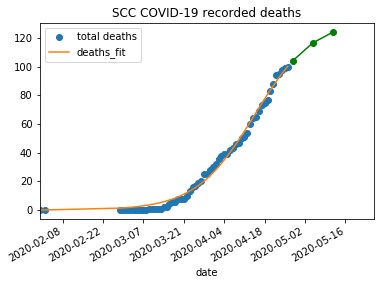

In [106]:
# Fit to fatalities
deaths = db['total deaths'].tolist()

## Perform a least-squares fit to the model
popt, pcov = curve_fit(func, x, deaths, p0=(.01,.2,1))  # , p0=(0.1,0.2,.2)
print(f'Fit to fatality data: a = {popt[0]} , b = {popt[1]}, c = {popt[2]}')

deaths_fit = func(x, *popt)
db['deaths_fit']=deaths_fit # Add column to dataframe

## Show the quality of the fit
print(f'R2: {r2(x,deaths,deaths_fit)}')

# Compute discrete date projections
#(apr1, apr1_fit) = dates2fit(datetime.today()-timedelta(days=27), refdate)
#est_1Apr = func(apr1_fit, *popt)
est_today = func(today_fit, *popt)
est_1wk = func(nextweek_fit, *popt)
est_2wk = func(next2week_fit, *popt)
print(f'April 1: {est_1Apr:,.0f}') # <-- WRONG! what's going on?
print(f'Today: {est_today:,.0f}')
print(f'+One week: {est_1wk:,.0f}')
print(f'+Two weeks: {est_2wk:,.0f}')

## total deaths and curve fit to data
ax3 = db.plot(x='date', y=['total deaths', 'deaths_fit'], style=['o','-'],title="SCC COVID-19 recorded deaths")
l = plt.legend()
#plt.figure()
ax3.plot([datetime.today(), datetime.today()+timedelta(days=7), datetime.today()+timedelta(days=14)],[est_today, est_1wk, est_2wk],'go-')
left, right = ax3.set_xlim()
ax3.set_xlim(right=right+30)
#plt.show()
#print([today, nextweek, next2week],[est_today, est_1wk, est_2wk])
#print(deaths)
#my_refdate = mdates.date2num(refdate)
#print(int(my_refdate))



86
132.996782566


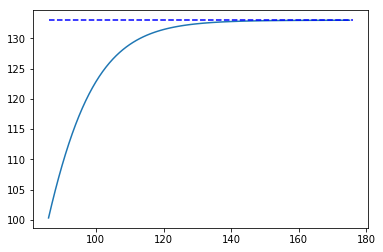

In [105]:
start = int(my_refdate)
#d = range(start,start+120)
#d = range(0,120)
d = db['number of days'].values
dt=d[-1]
d = range(dt,dt+90)
y = func(d, *popt)
plt.plot(d,y)
print(max(y))
plt.plot([dt, dt+90], [max(y), max(y)], 'b--')